In [1]:
import pandas as pd
from utils import *
import seaborn as sns
import matplotlib.pyplot as plt

# set plot size larger
sns.set(rc={"figure.figsize": (11.7, 8.27)})
# set seaborn style
sns.set_style("whitegrid")

In [2]:
train_data_melted = process_data("data/train.xlsx")
train_data_melted[:100]

,Date,Hour,Price
0,2007-01-01,1,25.01
1096,2007-01-01,2,25.01
2192,2007-01-01,3,22.01
3288,2007-01-01,4,9.01
4384,2007-01-01,5,0.01
...,...,...,...
25211,2007-01-04,24,32.01
4,2007-01-05,1,22.01
1100,2007-01-05,2,20.01
2196,2007-01-05,3,18.01


## Random action


In [3]:
env = SmartGridBatteryEnv(train_data_melted)  # Replace with your actual environment
log = []
num_episodes = 100  # Define the number of episodes

for episode in range(num_episodes):
    state = env.reset()  # Reset the environment for the new episode
    done = False
    total_reward = 0

    while not done:
        action = env.action_space.sample()  # Select a random action
        next_state, reward, done, _ = env.step(action)  # Take the action
        total_reward += reward  # Update the total reward

    log.append({"Episode": episode + 1, "Total Reward": total_reward})

    # print(f"Episode: {episode + 1}, Total Reward: {total_reward}")

env.close()  # Close the environment when done

In [4]:
log = pd.DataFrame(log)
log.head()

,Episode,Total Reward
0,1,-802288.408800
1,2,-854738.351422
2,3,-847825.305028
3,4,-771204.705644
4,5,-784912.395267


<Axes: xlabel='Episode', ylabel='Total Reward'>

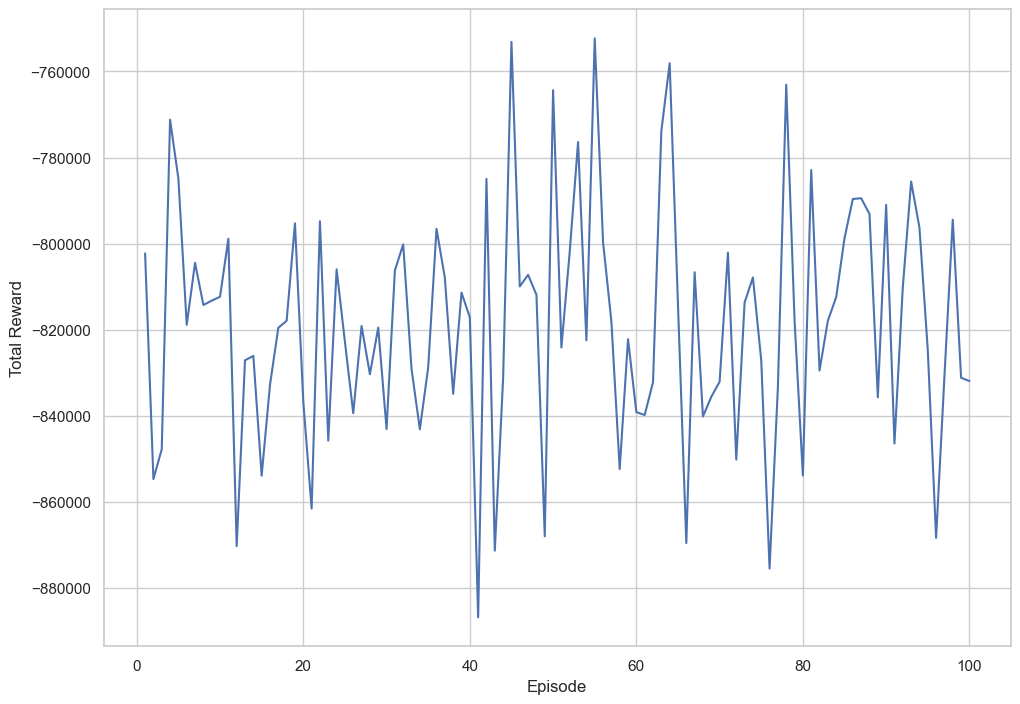

In [5]:
# plot log
sns.lineplot(data=log, x="Episode", y="Total Reward")

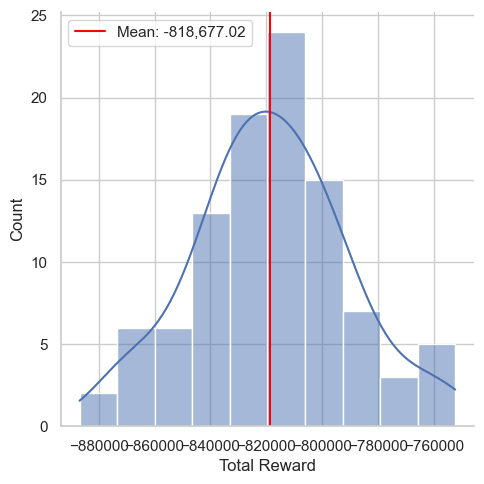

In [6]:
sns.displot(data=log, x="Total Reward", kde=True)
plt.axvline(log["Total Reward"].mean(), color='red', label=f"Mean: {format(log['Total Reward'].mean(), ',.2f')}")
plt.legend()

## Manual strategy 1


In [7]:
env = SmartGridBatteryEnv(train_data_melted)

# strategy: always charge at hour 5 and sell at hour 11

log = []
num_episodes = 100  # Define the number of episodes

for episode in range(num_episodes):
    state = env.reset()  # Reset the environment for the new episode
    done = False
    total_reward = 0

    while not done:
        state = env.state
        battery_level, hour, price = state
        if hour == 5:
            action = 10
        else:
            action = 5

        next_state, reward, done, _ = env.step(action)  # Take the action
        total_reward += reward  # Update the total reward

    log.append({"Episode": episode + 1, "Total Reward": total_reward})

env.close()


In [8]:
log = pd.DataFrame(log)
log.head()

,Episode,Total Reward
0,1,-549.440889
1,2,-607.987556
2,3,-576.464000
3,4,-596.345333
4,5,-521.427556


<Axes: xlabel='Episode', ylabel='Total Reward'>

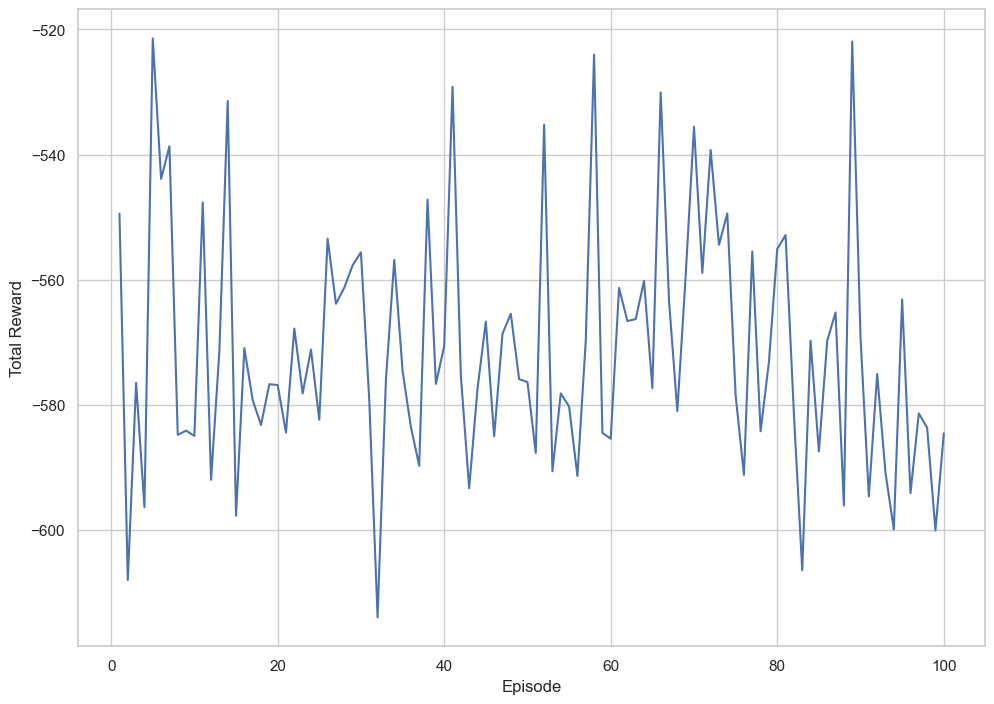

In [9]:
# plot log
sns.lineplot(data=log, x="Episode", y="Total Reward")

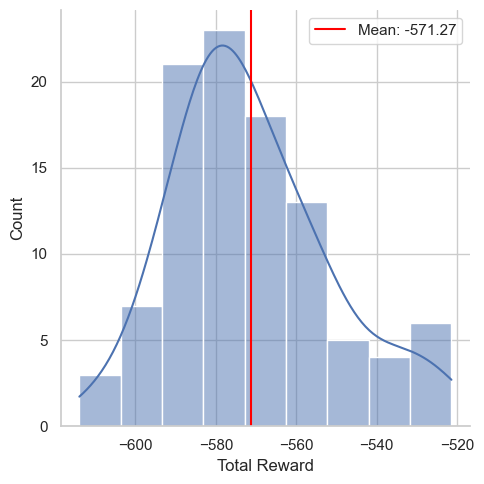

In [10]:
sns.displot(data=log, x="Total Reward", kde=True)
plt.axvline(log["Total Reward"].mean(), color='red', label=f"Mean: {format(log['Total Reward'].mean(), ',.2f')}")
plt.legend()

## Strategy 2


In [11]:
env = SmartGridBatteryEnv(train_data_melted)

# strategy: always charge at hour 5 and sell at hour 11

log = []
num_episodes = 100  # Define the number of episodes

for episode in range(num_episodes):
    state = env.reset()  # Reset the environment for the new episode
    done = False
    total_reward = 0

    while not done:
        state = env.state
        battery_level, hour, price = state
        if hour == 5:
            action = 10
        elif hour == 11:
            action = 0
        else:
            action = 5

        next_state, reward, done, _ = env.step(action)  # Take the action
        total_reward += reward  # Update the total reward

    log.append({"Episode": episode + 1, "Total Reward": total_reward})

env.close()


In [12]:
log = pd.DataFrame(log)
log.head()

,Episode,Total Reward
0,1,-2194.216028
1,2,-2175.626278
2,3,-2143.726583
3,4,-2125.160306
4,5,-2173.162417


<Axes: xlabel='Episode', ylabel='Total Reward'>

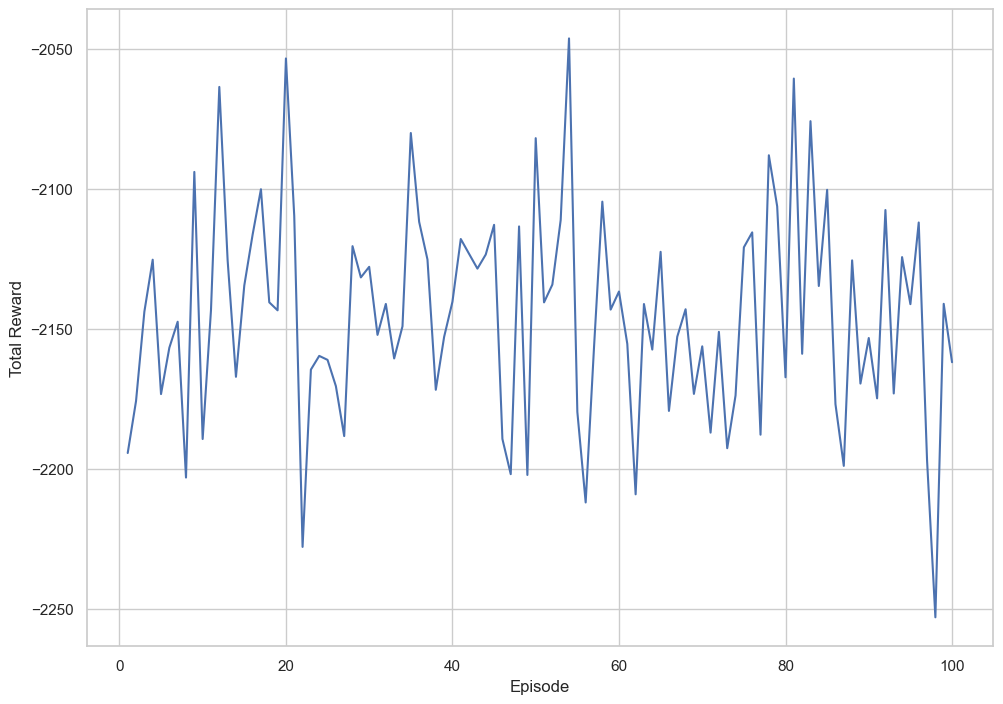

In [13]:
# plot log
sns.lineplot(data=log, x="Episode", y="Total Reward")

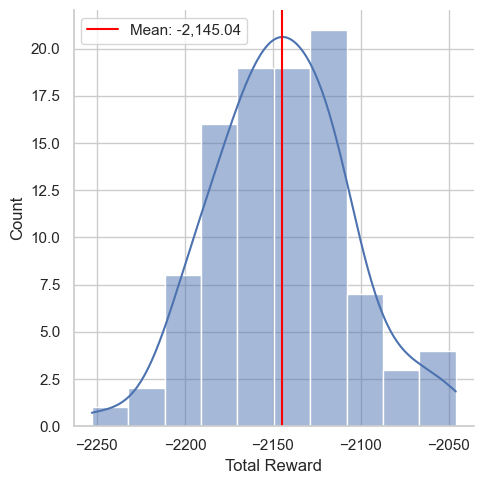

In [14]:
sns.displot(data=log, x="Total Reward", kde=True)
plt.axvline(log["Total Reward"].mean(), color='red', label=f"Mean: {format(log['Total Reward'].mean(), ',.2f')}")
plt.legend()

## RL


In [15]:
# env = SmartGridBatteryEnv(train_data_melted)

# # Create the agent
# agent = QLearningAgent(env.action_space)

# # Run the training loop
# num_episodes = 1000
# for episode in range(num_episodes):
#     state = env.reset()
#     done = False

#     while not done:
#         action = agent.choose_action(state)
#         next_state, reward, done, _ = env.step(action)
#         agent.learn(state, action, reward, next_state)
#         state = next_state